### load_breast_cancer데이터를 통하여 
### n_neighbor를 변화시켜 accuracy 를 판별하고 그래프그려보기

In [27]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
bc_data = datasets.load_breast_cancer()

In [13]:
print(bc_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [29]:
# from collections import Counter
# Counter(bc_data['target'])
np.bincount(bc_data['target'])

array([212, 357], dtype=int64)

In [74]:
# X,y 할당, 데이터 분할
X = bc_data['data']
y = bc_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 1)

In [82]:
# standard scaler 하면
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
sc.fit(X_test)
X_test_std = sc.transform(X_test)

In [85]:
# model 만들기, neighbor 별 train/test,accuracy 구하기
train_acc_list=[]
train_acc_list_std=[]
test_acc_list=[]
test_acc_list_std=[]
for i in range(1,50):
    clf = KNeighborsClassifier(n_neighbors = i)
    
    clf.fit(X_train,y_train)
    train_acc_list.append(clf.score(X_train,y_train))
    test_acc_list.append(clf.score(X_test,y_test))
    
    # standardize
    clf.fit(X_train_std,y_train)
    train_acc_list_std.append(clf.score(X_train_std,y_train))
    test_acc_list_std.append(clf.score(X_test_std,y_test))
    
     # print("train accuracy: ",np.mean(clf.predict(X_train)==y_train))

In [67]:
# 한글폰트
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None,fontext='ttf')
font_list[19]
font_path = 'C:/WINDOWS/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family']=font_name

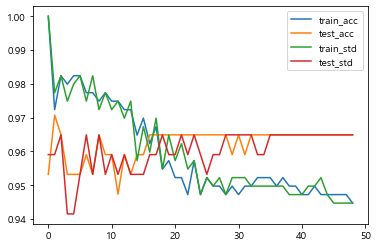

In [86]:
plt.plot(train_acc_list,label='train_acc')
plt.plot(test_acc_list,label='test_acc')
plt.plot(train_acc_list_std,label='train_std')
plt.plot(test_acc_list_std,label='test_std')
plt.legend()

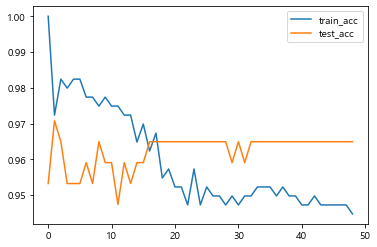

In [81]:
plt.plot(train_acc_list,label='train_acc')
plt.plot(test_acc_list,label='test_acc')
plt.legend()